
📊 Evaluation Metrics
Metric       | Random Forest   | XGBoost        
----------------------------------------------
Accuracy     | 0.8575          | 0.8746         
Precision    | 0.7471          | 0.8046         
Recall       | 0.6116          | 0.6287         
F1-Score     | 0.6726          | 0.7059         
AUC          | 0.9021          | 0.9279         


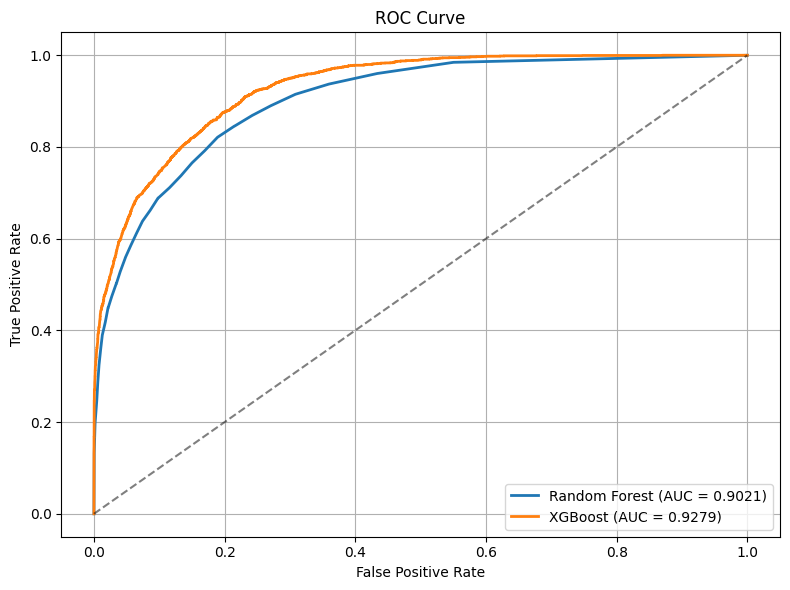

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/salmaznn/Machine-Learning/refs/heads/main/03.%20Week%203/Task%202/income.csv")

# Bersihkan target
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Imputasi & Encoding
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Inisialisasi dan latih model
rf = RandomForestClassifier(n_estimators=30, random_state=42)
xgb = XGBClassifier(n_estimators=20, eval_metric='logloss', random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Prediksi
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# Evaluasi
def evaluate(y_true, y_pred, y_prob):
    return {
        'Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Precision': round(precision_score(y_true, y_pred), 4),
        'Recall': round(recall_score(y_true, y_pred), 4),
        'F1-Score': round(f1_score(y_true, y_pred), 4),
        'AUC': round(roc_auc_score(y_true, y_prob), 4)
    }

rf_metrics = evaluate(y_test, rf_pred, rf_prob)
xgb_metrics = evaluate(y_test, xgb_pred, xgb_prob)

# Tampilkan hasil
print("\n📊 Evaluation Metrics")
print(f"{'Metric':<12} | {'Random Forest':<15} | {'XGBoost':<15}")
print("-" * 46)
for key in rf_metrics:
    print(f"{key:<12} | {str(rf_metrics[key]):<15} | {str(xgb_metrics[key]):<15}")

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_metrics['AUC']})", linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_metrics['AUC']})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Persamaan Matematika**

### **1. Accuracy**
Accuracy mengukur proporsi jumlah prediksi yang benar dibandingkan total data.  
Persamaan matematikanya adalah:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:
- \( TP \) = True Positive  
- \( TN \) = True Negative  
- \( FP \) = False Positive  
- \( FN \) = False Negative

---

### **2. Precision**
Precision mengukur ketepatan model dalam memprediksi kelas positif.  
Persamaan matematikanya adalah:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

### **3. Recall (Sensitivity)**
Recall mengukur seberapa banyak dari total positif yang berhasil diprediksi dengan benar.  
Persamaan matematikanya adalah:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### **4. F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall, cocok saat data tidak seimbang.  
Persamaan matematikanya adalah:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### **5. AUC - Area Under Curve**
AUC mengukur luas di bawah kurva ROC. Nilai AUC mendekati 1 menunjukkan performa yang sangat baik.  

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(x)\,dx
$$

Dengan definisi:
- $$\text{TPR} = \frac{TP}{TP + FN} $$

- $$\text{FPR} = \frac{FP}{FP + TN} $$